<img src = "https://thumbs2.imgbox.com/32/93/xRH3CBEG_t.png" width="250">

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn.model_selection import train_test_split

from funcoes.funcoes import *

import warnings
warnings.filterwarnings("ignore")

## Importando os dados

In [2]:
raw_data = pd.read_csv('dados/Loan_status_2007-2020Q3.csv', low_memory = False)

## Informações sobre o dataset

In [3]:
# o dataset original possui 2925493 observações e 71 variáveis
raw_data.shape

(2925493, 71)

Devido ao tamanho do dataset, as análises foram feitas em uma amostra aleatória que contém 30% dos dados do dataset original.

In [4]:
raw_data_sample = raw_data.sample(frac = 0.30, random_state = 42)

In [5]:
# o dataset amostral possui 877648 observações e 71 variáveis
raw_data_sample.shape

(877648, 71)

In [6]:
# salvando dados da amostra
#raw_data_sample.to_csv('dados/raw_data_sample.csv', index = False)

In [7]:
# 5 primeiras observações
raw_data_sample.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
2496120,76052463,9000.0,9000.0,9000.0,36 months,5.32%,271.04,A,A1,Assistant Director,...,1982.0,9.0,5.0,8.0,1301.0,5.0,120600.0,0.0,5.0,0.0
2843117,110539760,8300.0,8300.0,8300.0,36 months,9.44%,265.65,B,B1,HVAC technician,...,21058.0,86.0,1.0,1.0,3075.0,62.0,19200.0,0.0,1.0,0.0
2115028,51988788,4225.0,4225.0,4225.0,36 months,17.57%,151.84,D,D4,HUMAN RESOURCES,...,NaN,NaN,NaN,NaN,NaN,NaN,9380.0,NaN,NaN,NaN
2257006,39858012,28000.0,28000.0,28000.0,36 months,7.49%,870.85,A,A4,Emergency physician,...,NaN,NaN,NaN,NaN,NaN,NaN,75900.0,NaN,NaN,NaN
589992,135682739,3000.0,3000.0,3000.0,36 months,5.31%,90.34,A,A1,RN,...,28880.0,64.0,0.0,1.0,625.0,33.0,47300.0,2.0,3.0,2.0


In [8]:
# 5 últimas observações
raw_data_sample.tail()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
2418276,68384318,29000.0,29000.0,29000.0,36 months,5.32%,873.33,A,A1,Senior Financial Analyst,...,6897.0,69.0,0.0,0.0,13109.0,52.0,62100.0,0.0,0.0,0.0
406086,124774509,13000.0,13000.0,13000.0,36 months,5.32%,391.50,A,A1,Registered Nurse,...,40568.0,88.0,1.0,1.0,0.0,83.0,28700.0,0.0,0.0,0.0
2360030,72072149,12000.0,12000.0,12000.0,36 months,11.47%,395.55,B,B5,Payroll,...,28528.0,67.0,3.0,3.0,6337.0,68.0,19600.0,1.0,4.0,4.0
2098817,54100427,10000.0,10000.0,10000.0,36 months,12.69%,335.45,C,C2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,46700.0,NaN,NaN,NaN
651477,133032315,40000.0,40000.0,40000.0,60 months,7.34%,798.49,A,A4,Principal,...,134325.0,29.0,0.0,1.0,13660.0,16.0,72500.0,1.0,0.0,4.0


In [9]:
# colunas do dataset
raw_data_sample.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_co

In [10]:
raw_data_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877648 entries, 2496120 to 651477
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           877648 non-null  object 
 1   loan_amnt                    877648 non-null  float64
 2   funded_amnt                  877648 non-null  float64
 3   funded_amnt_inv              877648 non-null  float64
 4   term                         877648 non-null  object 
 5   int_rate                     877648 non-null  object 
 6   installment                  877648 non-null  float64
 7   grade                        877648 non-null  object 
 8   sub_grade                    877648 non-null  object 
 9   emp_title                    798000 non-null  object 
 10  emp_length                   815870 non-null  object 
 11  home_ownership               877648 non-null  object 
 12  annual_inc                   877646 non-null  float6

## Pré-processamento dos dados
---



### Variáveis irrelevantes ao modelo

No dataset há variáveis que serão irrelevantes para o modelo, que são identificadores do empréstimo, então foram retiradas: `id`, `member_id`, `url`, `title`, `zipcode`, `emp_title`.

- **id:** Identificação única atribuída pela LC ao empréstimo;
- **member_id:** Identificação única atribuída pela LC ao mutuário;
- **url:** URL para a página da LC com dados de listagem;
- **title:** O título do empréstimo fornecido pelo mutuário;
- **zipcode:** Os 3 primeiros números do código postal fornecidos pelo mutuário no pedido de empréstimo;
- **emp_title:** O cargo fornecido pelo mutuário ao solicitar o empréstimo.

A variável `sub_grade` também foi descartada, já que traz informações similares a variável `grade`.

- **sub_grade:** Subgrau de empréstimo atribuído pela LC;
- **grade:** Grau de empréstimo atribuído pela LC.

Também foram desconsideradas as variáveis  `collection_recovery_fee` e `total_rec_late_fee`, por serem dados sobre o futuro.

- **collection_recovery_fee:** Cobrança de taxa de coleta pelo correio; 
- **total_rec_late_fee:** Taxas atrasadas recebidas até o momento.
- **next_pymnt_d:** Próxima data de pagamento agendada

In [11]:
raw_data_sample.drop(['id', 'emp_title', 'url', 'title', 'zip_code',  
                      'sub_grade', 'collection_recovery_fee', 
                      'total_rec_late_fee', 'policy_code',
                      'next_pymnt_d'], inplace = True, axis = 1)

In [12]:
raw_data_sample.shape

(877648, 61)

### Variável `loan_status`

A variável dependente `loan_status`, que descreve a situação atual do empréstimo possui vários valores atribuídos e foi utilizada para a criação da variável resposta target.

In [13]:
raw_data_sample.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'Late (16-30 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Fully Paid', 'Issued',
       'Default', 'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

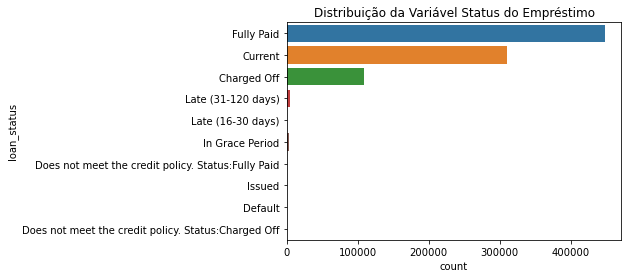

In [14]:
plt.title('Distribuição da Variável Status do Empréstimo')
sns.countplot(y = raw_data_sample.loan_status);

In [15]:
# cálculo do número de observações para cada valor único da variável
raw_data_sample['loan_status'].value_counts()

Fully Paid                                             448809
Current                                                309744
Charged Off                                            108910
Late (31-120 days)                                       4869
In Grace Period                                          2978
Late (16-30 days)                                         806
Issued                                                    599
Does not meet the credit policy. Status:Fully Paid        595
Does not meet the credit policy. Status:Charged Off       212
Default                                                   126
Name: loan_status, dtype: int64

In [16]:
# proporção de observações para cada valor único da variável
raw_data_sample['loan_status'].value_counts() / raw_data_sample['loan_status'].count()

Fully Paid                                             0.511377
Current                                                0.352925
Charged Off                                            0.124093
Late (31-120 days)                                     0.005548
In Grace Period                                        0.003393
Late (16-30 days)                                      0.000918
Issued                                                 0.000683
Does not meet the credit policy. Status:Fully Paid     0.000678
Does not meet the credit policy. Status:Charged Off    0.000242
Default                                                0.000144
Name: loan_status, dtype: float64

### Criação da variável dependente `target`

Devido a série de valores atribuídos a variável `loan_status`, optou-se por combinar seus valores em apenas dois, sendo que 0 irá representar os clientes "ruins", pessoas que entraram em default, e o 1 irá representar os clientes "bons", aqueles que não entraram em default.

In [17]:
# criando a variável target 
raw_data_sample['target'] = np.where(raw_data_sample['loan_status'].isin(['Charged Off', 'Default',
                                                     'Does not meet the credit policy. Status:Charged Off',
                                                     'Late (31-120 days)']), 0, 1)

É perceptível o desbalanceamento das classes, o que poderá influenciar o resultado final. No entanto, será aplicada a técnica de sobreamostragem minoritária sintética [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), de modo a equilibrar o conjunto de dados.

- 1: O cliente não teve dificuldades de pagamento  
- 0: O cliente teve dificuldades de pagamento

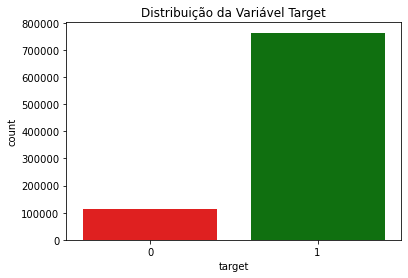

In [18]:
plt.title('Distribuição da Variável Target')
sns.countplot(x = raw_data_sample.target, palette = ['red', 'green']);

A porcentagem de default é de 13%.

In [19]:
raw_data_sample.target.value_counts(normalize=True) 

1    0.869974
0    0.130026
Name: target, dtype: float64

### Tratamento dos dados

Primeiramente foi realizada a transformação de algumas variáveis do tipo string para o tipo inteiro, sendo elas: 
- **emp_length:** Tempo de emprego em anos. Os valores possíveis estão entre 0 e 10, onde 0 significa menos de um ano e 10 significa dez ou mais anos;
- **term:** O número de pagamentos sobre o empréstimo. Os valores são em meses e podem ser de 36 ou 60;

In [20]:
raw_data_sample.emp_length.unique()

array(['10+ years', '3 years', '< 1 year', '7 years', '1 year', nan,
       '2 years', '5 years', '6 years', '4 years', '8 years', '9 years'],
      dtype=object)

Empréstimos para pessoas com mais de 10 anos empregadas são mais aprovados do que para as demais.

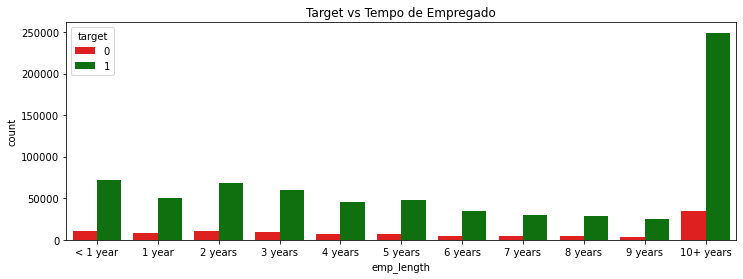

In [21]:
labels = [ '< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

plt.figure(figsize=(12,4))
plt.title('Target vs Tempo de Empregado')
sns.countplot(x = 'emp_length', data = raw_data_sample, order=labels, hue = 'target', palette = ['red', 'green']);

In [22]:
# substituindo strings
raw_data_sample['emp_length'] = raw_data_sample['emp_length'].str.replace('< 1 year', str(0), regex = True)
raw_data_sample['emp_length'] = raw_data_sample['emp_length'].str.replace('\+ years', '', regex = True)
raw_data_sample['emp_length'] = raw_data_sample['emp_length'].str.replace(' years', '', regex = True)
raw_data_sample['emp_length'] = raw_data_sample['emp_length'].str.replace(' year', '', regex = True)
raw_data_sample['emp_length'] = raw_data_sample['emp_length'].replace(np.nan, 0, regex = True)

# transformando dados de string para inteiro
raw_data_sample['emp_length'] = pd.to_numeric(raw_data_sample['emp_length'])

In [23]:
raw_data_sample.emp_length.unique()

array([10,  3,  0,  7,  1,  2,  5,  6,  4,  8,  9], dtype=int64)

In [24]:
raw_data_sample.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

Empréstimos com 36 meses são mais pagos do que os com 60 meses.

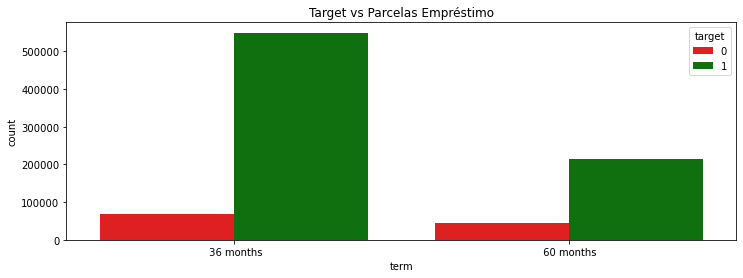

In [25]:
plt.figure(figsize=(12,4))
plt.title('Target vs Parcelas Empréstimo')
sns.countplot(x = 'term', data = raw_data_sample, hue = 'target', palette = ['red', 'green']);

In [26]:
# substituindo strings
raw_data_sample['term'] = raw_data_sample['term'].str.replace(' months', '', regex = True)
raw_data_sample['term'] = raw_data_sample['term'].replace(np.nan, 0, regex = True)

# transformando dados de string para inteiro
raw_data_sample['term'] = pd.to_numeric(raw_data_sample['term'])

In [27]:
raw_data_sample.term.unique()

array([36, 60], dtype=int64)

Agora, foi feita a conversão das variáveis `earliest_cr_line`, `issue_d`, `last_pymnt_d` e `last_credit_pull_d` para o formato de data e hora, e criadas as variáveis `mths_since_earliest_cr_line`,`mths_since_issue_d`, `mths_since_last_pymnt_d` e `mths_since_last_credit_pull_d` que serão utilizadas na regressão.

Foi selecionada a data de referência 31-12-2020 para calcular o número de meses que passaram, como se tratam de dados mais antigos.

- **earliest_cr_line:** O mês e ano em que foi aberta a linha de crédito mais antiga do mutuário;
- **mths_since_earliest_cr_line:** Variável criada para calcular o tempo em meses da abertura da linha de crédito até a data de 31-12-2020;
- **issue_d:** Mês e ano em que o empréstimo foi financiado;
- **mths_since_issue_d:** Variável criada para calcular o tempo em meses entre a data que o empréstimo foi financiado até a data de 31-12-2020;
- **last_credit_pull_d:** O mês mais recente LC retirou crédito para este empréstimo;
- **mths_since_last_credit_pull_d:** Variável criada para calcular o tempo em meses entre o mês mais recente LC retirou crédito para o empréstimo até a data de 31-12-2020;

In [28]:
raw_data_sample[['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']]

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
2496120,Apr-1998,Apr-2016,Jun-2017,May-2020
2843117,Sep-2011,Jun-2017,Jan-2020,May-2020
2115028,Apr-1987,Jun-2015,Nov-2016,Jan-2020
2257006,Oct-1985,Jan-2015,Feb-2018,Feb-2018
589992,Feb-2000,Jun-2018,May-2020,May-2020
...,...,...,...,...
2418276,Apr-1994,Jan-2016,Nov-2017,May-2020
406086,Oct-1998,Nov-2017,May-2020,May-2020
2360030,Oct-2002,Feb-2016,Dec-2016,Jun-2017
2098817,Jan-1994,Jul-2015,Aug-2017,May-2020


In [29]:
converte_colunas_data(raw_data_sample, 'issue_d')
converte_colunas_data(raw_data_sample, 'last_pymnt_d')
converte_colunas_data(raw_data_sample, 'last_credit_pull_d')
converte_colunas_data(raw_data_sample, 'earliest_cr_line')

### Tratando dados faltantes

Foram realizados diferentes tratamentos para os dados faltantes que serão descritos a seguir.

Para a variável `annual_inc` foi-se utilizada a média.

- **annual_inc:** A renda anual declarada pelo devedor do empréstimo durante o registro.

In [30]:
raw_data_sample['annual_inc'].fillna(raw_data_sample['annual_inc'].mean(), inplace = True)

`total_rev_hi_lim` o total rotativo crédito/limite de crédito possui alguns valores faltando, então faz sentido que os valores ausentes sejam iguais a `funded_amnt`, O valor total comprometido com esse empréstimo naquele momento.

In [31]:
raw_data_sample['total_rev_hi_lim'].fillna(raw_data_sample['funded_amnt'], inplace = True)

Todas as colunas com mais de 80% dos dados faltantes foram retiradas.

In [32]:
raw_data_sample = raw_data_sample.loc[:, raw_data_sample.isnull().mean() < .8]

In [33]:
raw_data_sample.isnull().mean().round(4)*100

loan_amnt                         0.00
funded_amnt                       0.00
funded_amnt_inv                   0.00
term                              0.00
int_rate                          0.00
installment                       0.00
grade                             0.00
emp_length                        0.00
home_ownership                    0.00
annual_inc                        0.00
verification_status               0.00
loan_status                       0.00
pymnt_plan                        0.00
purpose                           0.00
addr_state                        0.00
dti                               0.10
delinq_2yrs                       0.00
inq_last_6mths                    0.00
mths_since_last_delinq           52.54
open_acc                          0.00
pub_rec                           0.00
revol_bal                         0.00
revol_util                        0.09
total_acc                         0.00
initial_list_status               0.00
out_prncp                

Os demais dados faltantes foram preenchidos com zero.

In [34]:
raw_data_sample.fillna(0, inplace=True)

### Criando dummies

Foram criadas variáveis dummies das seguintes variáveis categóricas: `grade`, `home_ownership`, `verification_status`, `purpose`, `initial_list_status`

In [35]:
var_dummies = [pd.get_dummies(raw_data_sample['grade'], prefix = 'grade', prefix_sep = ':'),
               pd.get_dummies(raw_data_sample['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
               pd.get_dummies(raw_data_sample['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
               pd.get_dummies(raw_data_sample['purpose'], prefix = 'purpose', prefix_sep = ':'),
               pd.get_dummies(raw_data_sample['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

var_dummies = pd.concat(var_dummies, axis = 1)
raw_data_sample = pd.concat([raw_data_sample, var_dummies], axis = 1)

*Há algumas variáveis que não estão em tipos de dados apropriados e foram tratadas.*

Retirando símbolo % de `int_rate` e `revol_util`

- **int_rate:** Taxa de juros sobre o empréstimo;
- **revol_util:** Taxa de utilização da linha rotativa, ou a quantidade de crédito que o mutuário está usando em relação a todo crédito rotativo disponível.

In [36]:
raw_data_sample['int_rate'] = raw_data_sample['int_rate'].replace('%', '', regex = True)

# convertendo int_rate para número
raw_data_sample['int_rate'] = pd.to_numeric(raw_data_sample['int_rate'])

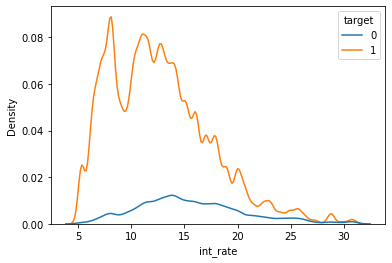

In [37]:
sns.kdeplot(raw_data_sample['int_rate'], hue=raw_data_sample['target']);

In [38]:
raw_data_sample['revol_util'] = raw_data_sample['revol_util'].replace('%', '', regex = True)

# convertendo revol_util para número
raw_data_sample['revol_util'] = pd.to_numeric(raw_data_sample['revol_util'])

In [39]:
# separandos dados categóricos e numéricos
var_cat = raw_data_sample.select_dtypes(exclude = 'number')
var_num = raw_data_sample.select_dtypes(exclude = 'object')

In [40]:
var_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877648 entries, 2496120 to 651477
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                877648 non-null  object
 1   home_ownership       877648 non-null  object
 2   verification_status  877648 non-null  object
 3   loan_status          877648 non-null  object
 4   pymnt_plan           877648 non-null  object
 5   purpose              877648 non-null  object
 6   addr_state           877648 non-null  object
 7   initial_list_status  877648 non-null  object
 8   application_type     877648 non-null  object
dtypes: object(9)
memory usage: 99.2+ MB


In [41]:
var_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877648 entries, 2496120 to 651477
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            877648 non-null  float64
 1   funded_amnt                          877648 non-null  float64
 2   funded_amnt_inv                      877648 non-null  float64
 3   term                                 877648 non-null  int64  
 4   int_rate                             877648 non-null  float64
 5   installment                          877648 non-null  float64
 6   emp_length                           877648 non-null  int64  
 7   annual_inc                           877648 non-null  float64
 8   dti                                  877648 non-null  float64
 9   delinq_2yrs                          877648 non-null  float64
 10  inq_last_6mths                       877648 non-null  float64
 11  mths_si

### Tratando dados duplicados

Mediante verificação realizada não há dados duplicados, então não foi necessária nenhuma medida quanto a isso.

In [42]:
raw_data_sample[raw_data_sample.duplicated()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w


### Correlação

Pela tabela de correlação abaixo foi possível verificar a multicolinearidade de algumas variáveis que foram retiradas

Essas variáveis apresentaram correlação forte, entre 0.6 a 0.9, ou muito forte, acima de 0.9.

In [43]:
correlacoes = raw_data_sample.corr().unstack().sort_values().drop_duplicates()

In [44]:
correlacoes[correlacoes.values > 0.5]

total_bal_il                   il_util                        0.502651
total_rec_int                  total_rec_prncp                0.513951
installment                    total_rec_int                  0.515313
il_util                        open_il_12m                    0.518310
open_il_24m                    inq_fi                         0.518951
total_pymnt                    last_pymnt_amnt                0.559071
last_pymnt_amnt                total_pymnt_inv                0.559082
mths_since_last_credit_pull_d  mths_since_issue_d             0.561399
mths_since_last_delinq         mths_since_last_major_derog    0.566554
total_rec_int                  funded_amnt_inv                0.578740
funded_amnt                    total_rec_int                  0.579114
total_rec_int                  loan_amnt                      0.579189
open_rv_24m                    open_acc_6m                    0.588018
funded_amnt_inv                total_rec_prncp                0.596732
funded

In [45]:
correlacoes[correlacoes.values < -0.5]

initial_list_status:f             initial_list_status:w                 -1.000000
home_ownership:MORTGAGE           home_ownership:RENT                   -0.792745
mths_since_issue_d                all_util                              -0.632077
purpose:credit_card               purpose:debt_consolidation            -0.629222
grade:A                           int_rate                              -0.628877
verification_status:Not Verified  verification_status:Source Verified   -0.605743
all_util                          mths_since_last_pymnt_d               -0.577401
mths_since_issue_d                il_util                               -0.554992
out_prncp                         mths_since_issue_d                    -0.549072
mths_since_issue_d                out_prncp_inv                         -0.549034
recoveries                        target                                -0.519205
dtype: float64

In [46]:
# retirando variáveis multicolineares 
dados_WoE_VI = raw_data_sample.drop(['initial_list_status:w', 'home_ownership:RENT', 'all_util', 
                                     'purpose:debt_consolidation', 'verification_status:Source Verified',
                                     'il_util', 'out_prncp', 'out_prncp_inv', 'total_rec_int', 
                                     'total_pymnt_inv', 'inq_fi','total_pymnt', 'mths_since_last_major_derog', 
                                     'mths_since_last_credit_pull_d', 'open_rv_24m', 'open_rv_12m', 
                                     'revol_bal','open_il_24m', 'loan_amnt','mths_since_last_pymnt_d', 
                                     'open_acc', 'funded_amnt_inv', 'installment', 'grade:A'], axis = 1)

*Obs.: a variável total_rec_prncp, principal recebido até o momento, foi deixada no dataset para o cálculo do fator de conversão de crédito, mas não será utilizada no modelo de probalidade de inadimplência. Como pode-se perceber sua correlação é de 0.6 com funded_amnt e uma das duas variáveis deveria ser retirada.* 

*O mesmo acontece com loan_status e recoveries, também foram deixadas por serem necessárias aos cálculos de índice por inadimplência*

### Estatísticas descritivas

In [47]:
# nomes e tipos de dados das colunas
dados_WoE_VI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877648 entries, 2496120 to 651477
Data columns (total 66 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   funded_amnt                       877648 non-null  float64
 1   term                              877648 non-null  int64  
 2   int_rate                          877648 non-null  float64
 3   grade                             877648 non-null  object 
 4   emp_length                        877648 non-null  int64  
 5   home_ownership                    877648 non-null  object 
 6   annual_inc                        877648 non-null  float64
 7   verification_status               877648 non-null  object 
 8   loan_status                       877648 non-null  object 
 9   pymnt_plan                        877648 non-null  object 
 10  purpose                           877648 non-null  object 
 11  addr_state                        877648 non-n

In [48]:
# medidas resumo das variáveis quantitativas
dados_WoE_VI.describe(percentiles = [.25, .5, .75, .95, .99])

,funded_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,pub_rec,...,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f
count,877648.000000,877648.000000,877648.000000,877648.000000,8.776480e+05,877648.000000,877648.000000,877648.000000,877648.000000,877648.000000,...,877648.000000,877648.000000,877648.000000,877648.000000,877648.000000,877648.000000,877648.000000,877648.000000,877648.000000,877648.000000
mean,15345.913396,43.094872,13.043788,5.418130,7.999860e+04,19.290343,0.288651,0.553079,16.608563,0.175903,...,0.006836,0.021460,0.011997,0.006465,0.061006,0.000563,0.010189,0.006933,0.000785,0.268455
std,9466.009368,10.951706,4.859772,3.912846,1.435073e+05,16.019488,0.843553,0.858343,23.092241,0.536300,...,0.082400,0.144911,0.108871,0.080145,0.239342,0.023718,0.100423,0.082977,0.028008,0.443156
min,500.000000,36.000000,5.310000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,36.000000,9.170000,2.000000,4.700000e+04,12.050000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,36.000000,12.490000,5.000000,6.600000e+04,18.070000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,60.000000,15.990000,10.000000,9.500000e+04,24.870000,0.000000,1.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
95%,35000.000000,60.000000,22.350000,10.000000,1.686273e+05,34.690000,2.000000,2.000000,68.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
99%,40000.000000,60.000000,27.270000,10.000000,2.800000e+05,48.320000,4.000000,3.000000,79.000000,2.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,40000.000000,60.000000,30.990000,10.000000,1.100000e+08,999.000000,58.000000,32.000000,226.000000,86.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Estatísticas dos dados categóricos
dados_WoE_VI.describe(include = 'object').T

,count,unique,top,freq
grade,877648,7,B,257221
home_ownership,877648,6,MORTGAGE,430783
verification_status,877648,3,Source Verified,341893
loan_status,877648,10,Fully Paid,448809
pymnt_plan,877648,1,n,877648
purpose,877648,14,debt_consolidation,491672
addr_state,877648,51,CA,121479
initial_list_status,877648,2,w,642039
application_type,877648,2,Individual,814440


*Não foi realizado nenhum tratamento quanto a outliers da amostra.*

## Feature Selection 
---

Foram separadas duas bases de dados, uma contendo features que foram selecionadas pelo *Weight of Evidence* e *Information Value*, ou Peso de Evidência e Valor da Informação, técnicas estatística comumente utilizadas para selecionar e agrupar variáveis em modelos de classificação.

A outra base de dados recebeu as variáveis selecionadas pelo LightGBM utilizando a função [feature_importances](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html), em que as features serão avaliadas por seu peso ou contribuição no modelo. 

### Weight of Evidence (WoE)

Em análises de respostas binárias, o que ocorre em casos de concessão de crédito, a medida que mostra até que ponto uma variável independente prediz uma variável dependente, ou seja, o peso da evidência, é utilizada a fim de medir o grau de incerteza envolvido na predição de eventos. Neste, será usado para agrupar categorias com WoE similares.

É calculada por:

<br>

\begin{align}
\text{WoE:} \qquad &\ln \left( \frac{\text{% Bons}_i}{\text{% Ruins}_i} \right)   \\[10pt]
\end{align}

<br>

In [50]:
# executando a função para cálculo de WoE e IV
iv, woe = iv_woe(dados_WoE_VI, target = 'target', bins=20)

In [51]:
woe

,Variavel,Cutoff,N,Eventos,%_Eventos,Nao_Eventos,%_Nao_Eventos,WoE,IV
0,funded_amnt,"(499.999, 3250.0]",44071,39855,0.052198,4216,0.036945,0.345632,5.272172e-03
1,funded_amnt,"(3250.0, 5000.0]",70194,62440,0.081778,7754,0.067948,0.185268,2.562280e-03
2,funded_amnt,"(5000.0, 6000.0]",40835,36545,0.047863,4290,0.037593,0.241528,2.480532e-03
3,funded_amnt,"(6000.0, 7000.0]",29683,26324,0.034477,3359,0.029435,0.158108,7.971754e-04
4,funded_amnt,"(7000.0, 8000.0]",45321,39813,0.052143,5508,0.048266,0.077262,2.995474e-04
...,...,...,...,...,...,...,...,...,...
1,purpose:vacation,1,6085,5296,0.006936,789,0.006914,0.003211,7.141390e-08
0,purpose:wedding,0,876959,762922,0.999202,114037,0.999299,-0.000097,9.333753e-09
1,purpose:wedding,1,689,609,0.000798,80,0.000701,0.129062,1.246420e-05
0,initial_list_status:f,0,642039,566947,0.742533,75092,0.658026,0.120822,1.021029e-02


### Information Value (IV)

Já o valor da informação (*Information Value* - IV),  que mede a força da relação entre a variável dependente e a independente, irá ajudar a selecionar as variáveis úteis para o modelo de Regressão Logística.

O valor da informação é calculado por:

<br>

\begin{align}
\text{IV:} \qquad &\sum_{i=1}^n \left( \text{% Bons}_i - \text{% Ruins}_i \right) \cdot \ln \left( \frac{\text{% Bons}_i}{\text{% Ruins}_i} \right)
\end{align}

<br><br>

A tabela abaixo mostra a relação entre IV e poder preditivo de uma variável:

<br>

Valor da Informação|Força Preditiva
-------------------|---------------
< 0.02             | Insignificante
0.02 - 0.1         | Fraca         
0.1 - 0.3          | Média         
0.3 - 0.5          | Forte         
> 0.5              | Superforte  

Considerando a tabela abaixo e a força predivita das variáveis, serão selecionadas apenas as que tiverem valor de informação maior que 0.02 e menores que 0.5.

In [52]:
iv[(iv.IV > 0.02) & (iv.IV < 0.5)]

,Variavel,IV
0,funded_amnt,0.031057
0,term,0.065489
0,int_rate,0.430151
0,home_ownership,0.024007
0,annual_inc,0.035667
0,verification_status,0.098472
0,purpose,0.022435
0,dti,0.025926
0,inq_last_6mths,0.035062
0,revol_util,0.032334


Foram selecionados apenas os dados que se estavam dentro dos parâmetros pre-determinados, resultando em 17 variáveis escolhidas pelo método e foi verificada a correlação entre elas.

In [54]:
# seleção dos dados
dados_WoE_VI = raw_data_sample[['funded_amnt', 'term', 'int_rate', 'home_ownership', 'annual_inc',
                                'verification_status', 'purpose', 'dti', 'inq_last_6mths', 'revol_util',
                                'initial_list_status', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il',
                                'max_bal_bc', 'total_rev_hi_lim', 'grade', 'total_rec_prncp', 'loan_status', 
                                'recoveries','target']]

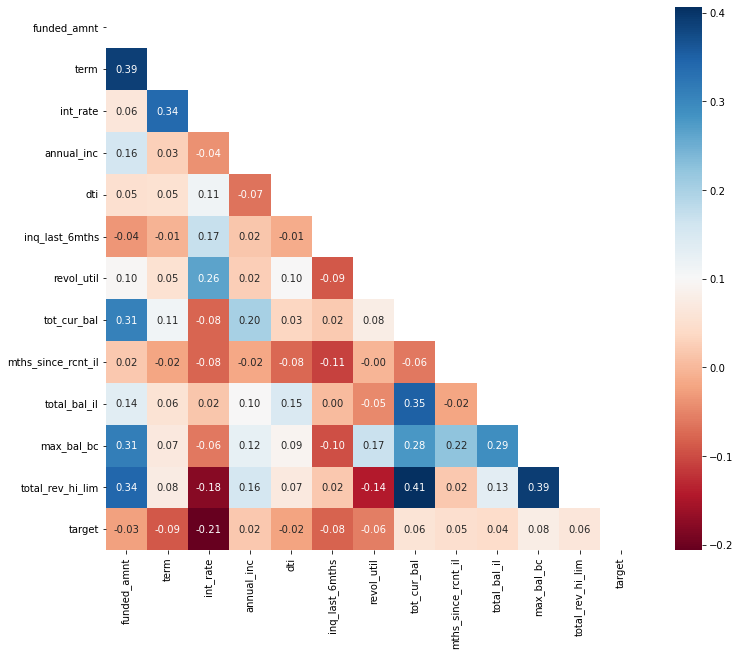

In [55]:
# separação dos dados selecionados por IV
df = raw_data_sample[['funded_amnt', 'term', 'int_rate', 'home_ownership', 'annual_inc',
                                'verification_status', 'purpose', 'dti', 'inq_last_6mths', 'revol_util',
                                'initial_list_status', 'tot_cur_bal', 'mths_since_rcnt_il', 'total_bal_il',
                                'max_bal_bc', 'total_rev_hi_lim', 'grade', 'target']]

# matriz de correlação das variáveis 
sns.set_context(font_scale = 1.9)
plt.figure(figsize=(12,10))
sns.heatmap(
    df.corr(), 
    annot = True, 
    fmt   = '.2f', 
    cmap  = 'RdBu',
    mask  = np.triu(
        np.ones_like(df.corr()) 
    ) 
);

In [55]:
# salvando dados
dados_WoE_VI.to_csv('dados/dados_WoE_VI.csv', index = False)

*Após essas alterações, será realizado um agrupamento de algumas classes das variáveis para o modelo que irá utilizar os dados separados pelo WoE e IV.*

### LightGBM

O [LightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/) é uma estrutura de aumento de gradiente que usa algoritmos de aprendizado baseados em árvore. É baseado em histograma e coloca valores contínuos em compartimentos discretos, o que leva a um treinamento mais rápido e um uso mais eficiente da memória.

Como foram selecionadas 18 features anteriomente, também foram escolhidas as 17 melhores features retornadas pelo feature importance.

In [56]:
dados = raw_data_sample.iloc[:,0:55]

X = dados.drop(['target'], axis = 1)
y = dados['target']

In [57]:
for c in X.columns:
    col_type = X[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X[c] = X[c].astype('category')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [59]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto' 
           }

In [60]:
clf = lgb.LGBMClassifier(num_leaves = 15, 
                         max_depth = -1, 
                         random_state = 42, 
                         silent = True, 
                         metric = 'None', 
                         n_jobs = 4, 
                         n_estimators = 1000, 
                         colsample_bytree = 0.9,
                         subsample = 0.9, 
                         learning_rate = 0.1)

In [61]:
clf.fit(X_train, y_train, **fit_params)

[100]	valid's auc: 0.995763


LGBMClassifier(colsample_bytree=0.9, metric='None', n_estimators=1000, n_jobs=4,
               num_leaves=15, random_state=42, silent=True, subsample=0.9)

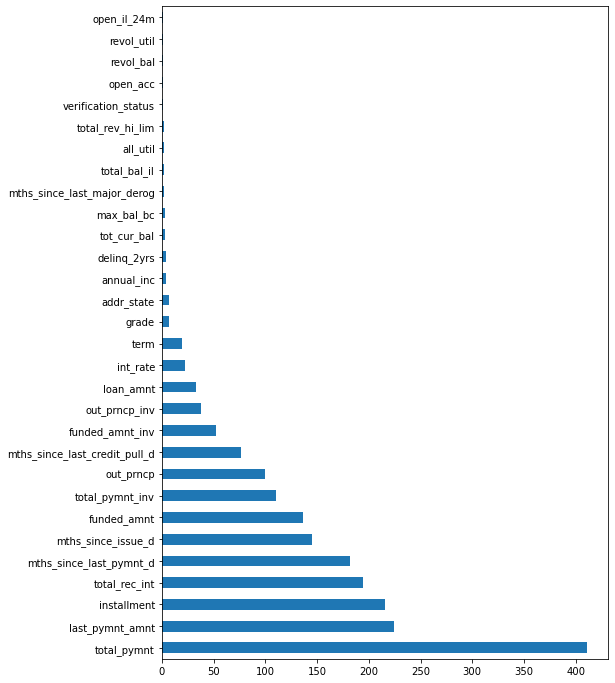

In [62]:
feat_imp = pd.Series(clf.feature_importances_, index = X.columns)
feat_imp.nlargest(30).plot(kind = 'barh', figsize=(8,12));

Separando as variáveis para a verificação de correlação.

In [63]:
# separando as features principais que não apresentaram correlação acima de 0.5
dados_LightGBM = raw_data_sample[['last_pymnt_amnt', 'funded_amnt', 'max_bal_bc', 
                                  'out_prncp', 'mths_since_last_credit_pull_d', 'all_util',
                                  'term', 'int_rate', 'addr_state', 'grade', 
                                  'mths_since_earliest_cr_line', 'tot_cur_bal', 'total_rev_hi_lim',
                                  'verification_status', 'dti', 'delinq_2yrs', 'open_acc', 'target']]

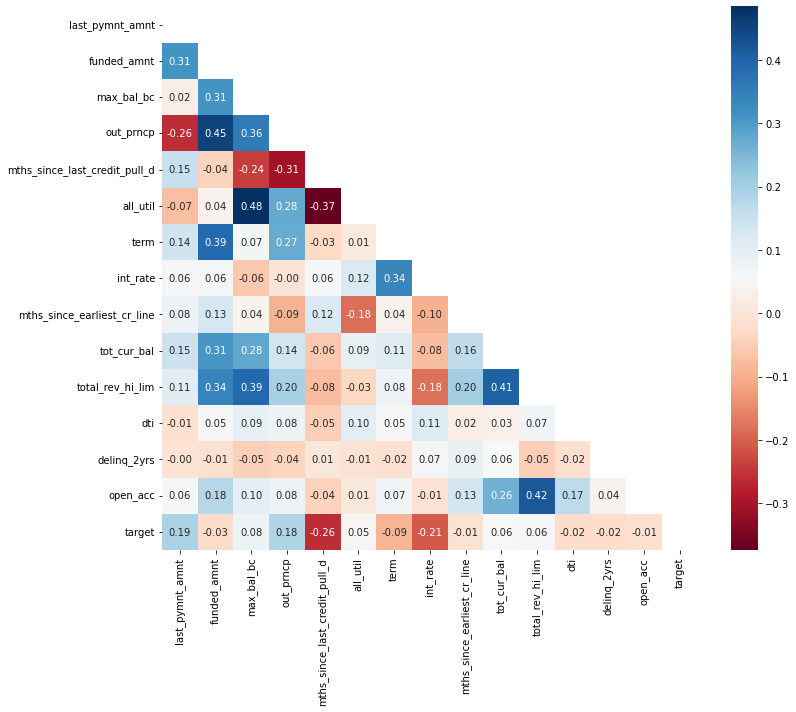

In [64]:
# matriz de correlação das variáveis 
sns.set_context(font_scale = 1.9)
plt.figure(figsize = (12,10))
sns.heatmap(
    dados_LightGBM.corr(), 
    annot = True, 
    fmt   = '.2f', 
    cmap  = 'RdBu',
    mask  = np.triu(
        np.ones_like(dados_LightGBM.corr()) 
    ) 
);

In [65]:
# salvando dados
dados_LightGBM.to_csv('dados/dados_LightGBM.csv', index = False)

In [66]:
# criando dummies para variáveis categóricas
var_dummies = [pd.get_dummies(dados_LightGBM['addr_state'], prefix='addr_state', prefix_sep=':'),
               pd.get_dummies(dados_LightGBM['grade'], prefix='grade', prefix_sep=':'),
               pd.get_dummies(dados_LightGBM['verification_status'], prefix='verification_status', prefix_sep=':')]

var_dummies = pd.concat(var_dummies, axis = 1)
dados_LightGBM = pd.concat([dados_LightGBM, var_dummies], axis = 1)

Retirando uma categoria criada de cada variável para evitar multicolinearidade.

In [67]:
dados_LightGBM.drop(['grade:A', 'addr_state:WY', 'verification_status:Verified'], axis = 1, inplace = True)

Retirando variáveis que foram criados dummies.

In [68]:
dados_LightGBM.drop(['addr_state', 'grade', 'verification_status'], axis = 1, inplace = True)

In [69]:
# salvando dados
dados_LightGBM.to_csv('dados/dados_LightGBM_final.csv', index = False)

*A intenção neste momento do projeto é analisar qual modelo irá performar melhor na classificação, diante das duas formas de seleção de features diferentes, uma mais comumente utilizada no meio de análises de risco de crédito, WoE e IV, e a outra mais automática e atual, com o LightGBM.*

---